# Test Dataset
test dataset is corresponding with the test case as in the reference

`pyvol` can provide fast and efficient local volatility surface corresponding to the market prices.

In [16]:
strikes = [355.0, 357.5, 360.0, 362.5, 365.0, 367.5, 370.0, 372.5, 375.0, 377.5, 380.0, 382.5, 385.0, 387.5, 390.0]
dt = 1/365.0
ttms = [6 * dt, 34 * dt, 62 * dt]
initial_price = 356.01
r = 0.0151
market_prices = [3.61, 2.20, 1.22, 0.62, 0.25, 0.11, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
                7.52, 6.09, 4.85, 3.82, 2.95, 2.18, 1.60, 1.14, 0.79, 0.54, 0.39, 0.27, 0.21, 0.15, 0.12,
                10.00, 8.55, 7.04, 6.35, 5.29, 4.37, 3.32, 2.68, 2.30, 1.74, 1.47, 1.16, 0.91, 0.72, 0.55]

from pyvol import LocalVolatilitySurface, OptionType, Interpolator 
span = 3
interval = 100
surface= LocalVolatilitySurface(initial_price, ttms, strikes, market_prices, OptionType.CALL, dt, r, span, interval, Interpolator.Bilinear)
vol= surface.LocalVol()
numerical_value = surface.VanillaFD(vol)

In [17]:
numerical_value

array([3.43955878e+00, 2.18870114e+00, 1.25585033e+00, 7.16340649e-01,
       3.94492882e-01, 1.93471366e-01, 9.15364143e-02, 4.71071871e-02,
       2.09405940e-02, 8.30236365e-03, 4.09125354e-03, 1.72387906e-03,
       6.35139639e-04, 2.70377211e-04, 1.12588671e-04, 7.41467861e+00,
       6.03935742e+00, 4.81290571e+00, 3.79612246e+00, 2.95397280e+00,
       2.23677273e+00, 1.65754148e+00, 1.23023819e+00, 8.82743343e-01,
       6.09613604e-01, 4.29354924e-01, 2.92213024e-01, 1.89935621e-01,
       1.23992115e-01, 8.04471796e-02, 9.98484895e+00, 8.57093127e+00,
       7.27297888e+00, 6.13863617e+00, 5.14436721e+00, 4.25323169e+00,
       3.47883857e+00, 2.84368882e+00, 2.28815683e+00, 1.80916771e+00,
       1.43829778e+00, 1.12626250e+00, 8.64367414e-01, 6.62084121e-01,
       5.05099453e-01])

## Data Visualization

### Numerical Values vs Market Data

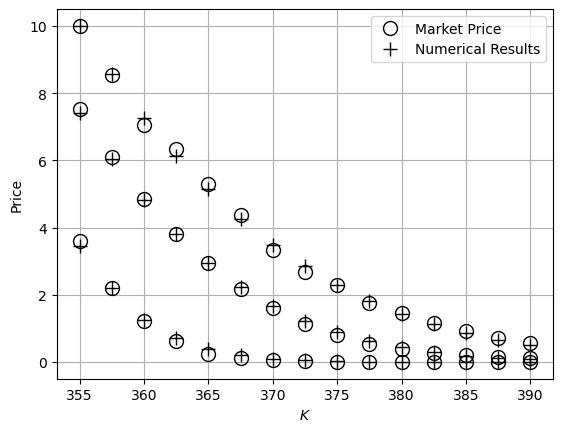

In [18]:
import matplotlib.pyplot as plt
import numpy as np
n_k = len(strikes)
n_t = len(ttms)
plot_strikes = np.zeros(n_t * n_k) 
for k in range(n_t):
    plot_strikes[n_k * k: n_k * (k + 1)] = strikes

plt.figure()
plt.plot(plot_strikes, market_prices, 'ko', linewidth=1, markersize=10, fillstyle = 'none')
plt.plot(plot_strikes, numerical_value, 'k+', linewidth=1, markersize=10)
plt.legend(['Market Price', 'Numerical Results'], loc='best')
plt.xlabel('$K$')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Local Volatility Interpolator

In [19]:
import pandas as pd
vol_data = surface.GetVolSurf()
prices = surface.GetPrices()
times = surface.GetTimes()
df = pd.DataFrame(vol_data.T, columns = prices, index = times)
df

,0.0000,3.5601,7.1202,10.6803,14.2404,17.8005,21.3606,24.9207,28.4808,32.0409,...,1035.9891,1039.5492,1043.1093,1046.6694,1050.2295,1053.7896,1057.3497,1060.9098,1064.4699,1068.0300
0.000000,0.100000,0.781763,0.077289,0.260048,0.679964,0.348376,0.546190,0.032019,0.351939,0.770163,...,0.134670,0.644902,0.169016,0.117871,0.118613,0.119355,0.900943,0.133597,0.117175,0.108519
0.002740,0.117998,0.764983,0.074073,0.266713,0.686629,0.366474,0.529386,0.028827,0.358578,0.776802,...,0.134831,0.663325,0.153344,0.117882,0.118624,0.119366,0.919328,0.133255,0.117038,0.108382
0.005479,0.135996,0.748203,0.070857,0.273379,0.693295,0.384571,0.512582,0.025635,0.365216,0.783440,...,0.134992,0.681748,0.137673,0.117894,0.118636,0.119378,0.903695,0.132914,0.116901,0.108244
0.008219,0.153994,0.731423,0.067640,0.280044,0.699960,0.402669,0.495778,0.022443,0.371855,0.790079,...,0.135153,0.700171,0.137274,0.117906,0.118648,0.119390,0.888063,0.132572,0.116763,0.108107
0.010959,0.171992,0.714644,0.064424,0.286709,0.706625,0.420767,0.478974,0.019252,0.378493,0.796717,...,0.135314,0.718594,0.136875,0.117918,0.118660,0.119402,0.872430,0.132230,0.116626,0.107969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.158904,0.865662,0.093370,0.226721,0.646637,0.257886,0.630210,0.047979,0.318747,0.736971,0.508559,...,0.552788,0.247373,0.117812,0.118554,0.119296,0.809021,0.135306,0.117862,0.109206,0.100550
0.161644,0.848882,0.090154,0.233387,0.653303,0.275984,0.613406,0.044787,0.325385,0.743609,0.526757,...,0.571211,0.231701,0.117824,0.118566,0.119308,0.827405,0.134964,0.117725,0.109069,0.100412
0.164384,0.832102,0.086938,0.240052,0.659968,0.294082,0.596602,0.041595,0.332024,0.750248,0.544955,...,0.589634,0.216030,0.117835,0.118577,0.119319,0.845790,0.134622,0.117588,0.108931,0.100275
0.167123,0.815322,0.083721,0.246717,0.666633,0.312180,0.579798,0.038403,0.338662,0.756886,0.563153,...,0.608057,0.200359,0.117847,0.118589,0.119331,0.864174,0.134281,0.117450,0.108794,0.100137


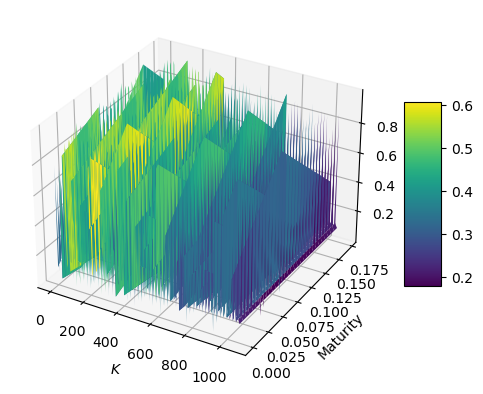

In [20]:
x, y = np.meshgrid(df.columns.values.astype(float), df.index.values.astype(float))
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, df.values.astype(float), cmap = 'viridis')
ax.set_xlabel("$K$")
ax.set_ylabel('Maturity')
ax.set_zlabel('$\sigma$')
fig.colorbar(surf, shrink=0.5, aspect=5, ax = ax)
plt.show()